# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [16]:
from utils import get_dataset
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
%matplotlib inline

In [17]:
dataset = get_dataset("./data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['./data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 87


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [18]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # color mapping of classes
    colormap = {1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]}
    
    # create an empty plot
    f, ax = plt.subplots(3, 4, figsize=(20, 20),squeeze=True)
    
    # plot each sample
    for i, sample in enumerate(batch):
        x = i % 3
        y = i % 4
        img = sample["image"].numpy()
        ax[x, y].imshow(img)
        
        bboxes = sample['groundtruth_boxes'].numpy()
        classes = sample['groundtruth_classes'].numpy()
        
        for cl, bb in zip(classes, bboxes):
            y1 , y2 = bb[[0, 2]] * img.shape[0]
            x1, x2 = bb[[1, 3]] * img.shape[1]
            rec = Rectangle((x1, y1), x2- x1, y2-y1, facecolor='none', 
                            edgecolor=colormap[cl])
            ax[x, y].add_patch(rec)
        ax[x ,y].axis('off')
    plt.tight_layout()    

## Display 12 images 

Using the dataset created in the second cell and the function you just coded, display 12 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

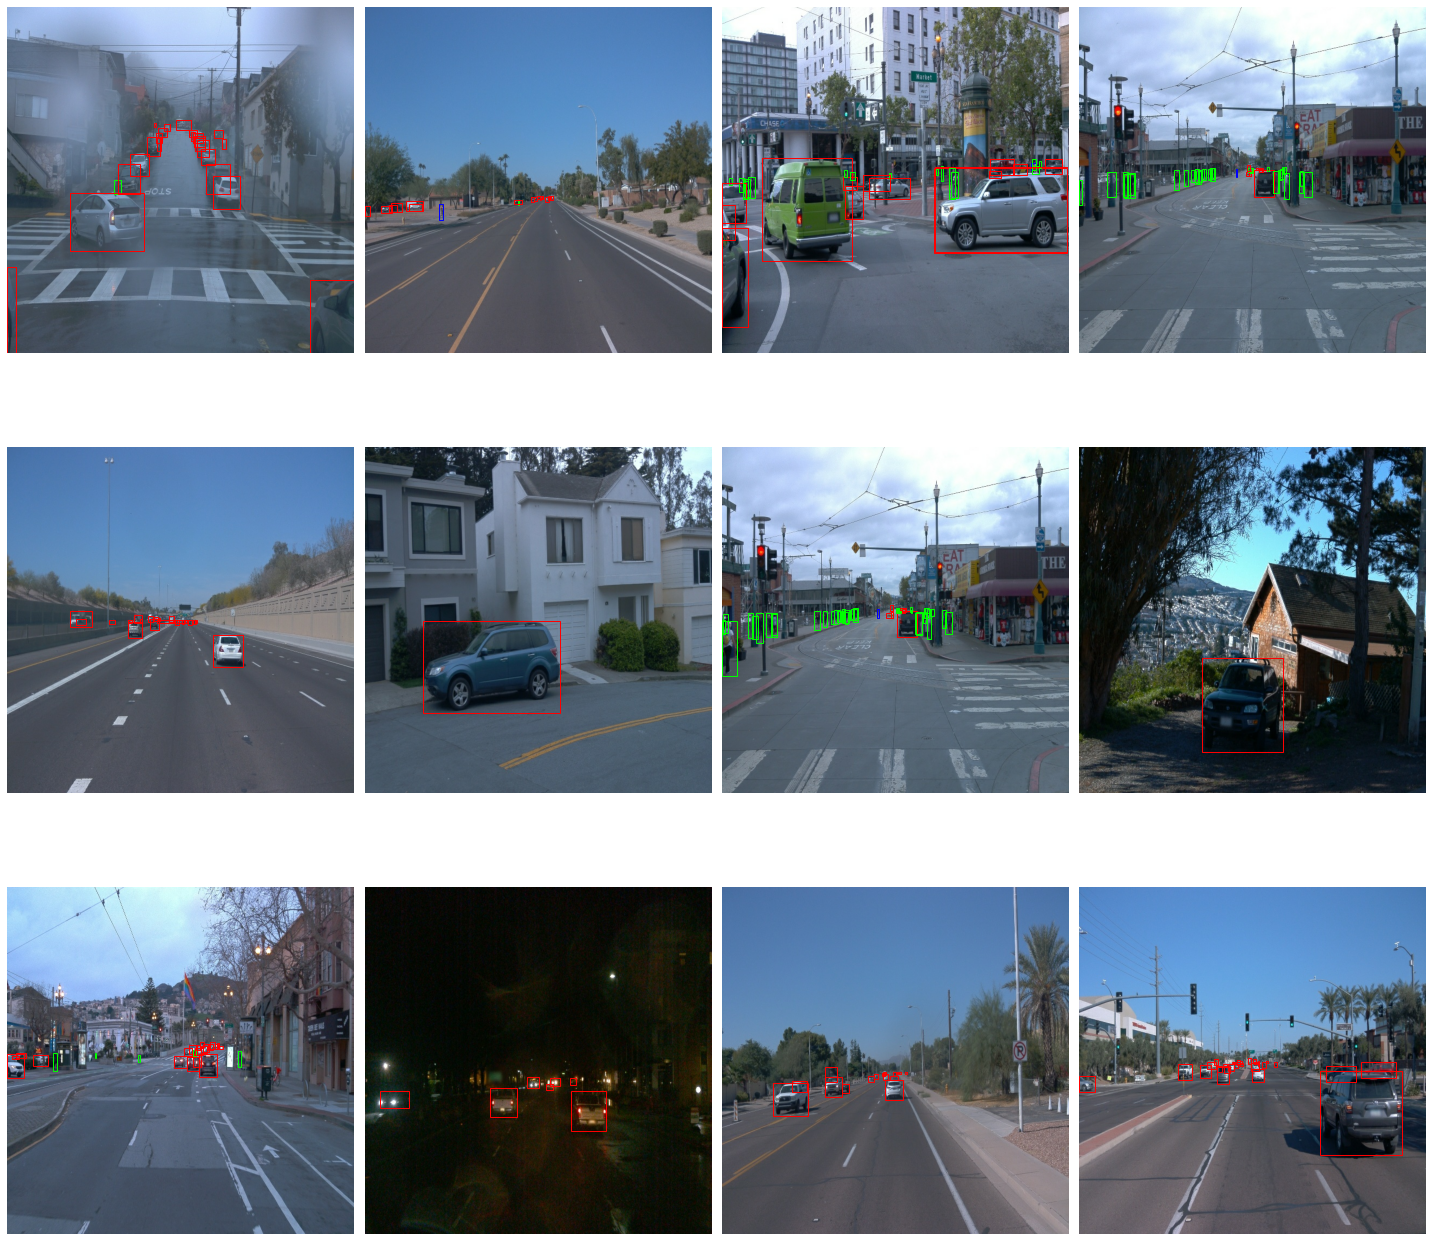

In [24]:
instances_sample_size = 12
instances_batch = dataset.shuffle(instances_sample_size, reshuffle_each_iteration=True).take(instances_sample_size)
display_instances(instances_batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

Create a function to display data distribution:

In [20]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

def display_distribution(dataset):
    """
    This function takes the dataset and display the data distribution 
    """
    class_distribution = np.array([])
    object_distribution = np.array([])
    
    for sample in dataset:
        classes = sample['groundtruth_classes'].numpy()
        class_distribution = np.append(class_distribution, classes )
        object_distribution = np.append(object_distribution, len(classes))
    unique, counts = np.unique(class_distribution, return_counts=True)
    
    distribution_fig, distribution_ax = plt.subplots(figsize=(10, 10))
    explode = (0.1, 0.1, 0.1)
    labels = 'Vehicles', 'Pedestrians', 'Cyclists'
    distribution_ax.pie(counts, explode=explode, labels=labels, autopct=make_autopct(counts))
    distribution_ax.axis('equal') 
    
    plt.style.use('_mpl-gallery')
    hist_fig, hist_ax = plt.subplots(figsize=(10, 10))
    hist_ax.set(xlabel='Number of Lables in Image', ylabel='Number of Images')
    hist_ax.hist(object_distribution, bins=10, linewidth=0.5, edgecolor="white")
    
    

Use `display_distribution` function to display data

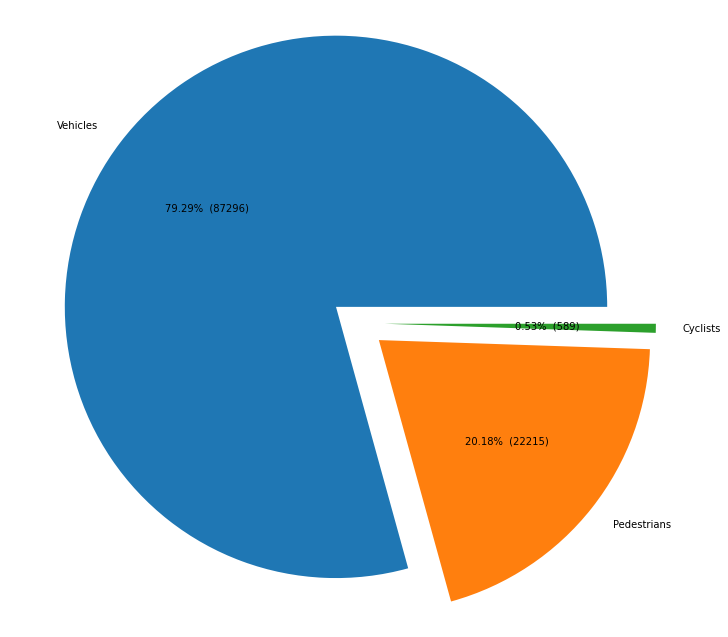

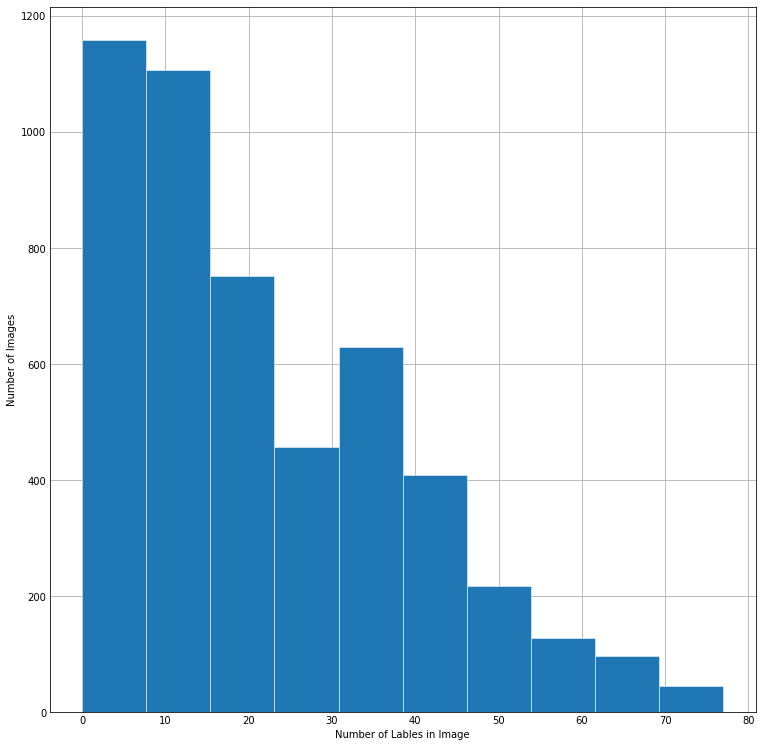

In [21]:
distribution_sample_size = 5000
distribution_batch = dataset.shuffle(distribution_sample_size, reshuffle_each_iteration=True).take(distribution_sample_size)
display_distribution(distribution_batch)